In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy, fidelity

f = open('./benchmark_data/bv/classical_uniter_input_ibmq_boeblingen_bv.p', 'rb' )
plotter_input = pickle.load(f)
print(plotter_input.keys())

f = open('./benchmark_data/bv/quantum_uniter_input_ibmq_boeblingen_bv.p', 'rb' )
plotter_input = pickle.load(f)
print(plotter_input.keys())

dict_keys([(11, 21), (12, 22), (12, 23), (13, 24), (13, 25), (14, 26), (14, 27), (15, 28), (15, 29), (16, 30)])
dict_keys([(11, 21), (12, 22), (12, 23), (13, 24), (13, 25), (14, 26), (14, 27), (15, 28), (15, 29), (16, 30)])


In [4]:
case = (16,30)
print(plotter_input[case].keys())
print(plotter_input[case]['quantum_time'])

# circ = plotter_input[case]['full_circ']
# d1 = plotter_input[case]['fc_evaluations']['sv_noiseless']
# d2 = plotter_input[case]['fc_evaluations']['qasm']
# d3 = plotter_input[case]['fc_evaluations']['hw']
# print(sum(d1),sum(d2),sum(d3))

dict_keys(['full_circ', 'searcher_time', 'clusters', 'complete_path_map', 'classical_time', 'quantum_time', 'all_cluster_prob'])
183.98562335968018


In [84]:
max_idx = d1.index(max(d1))

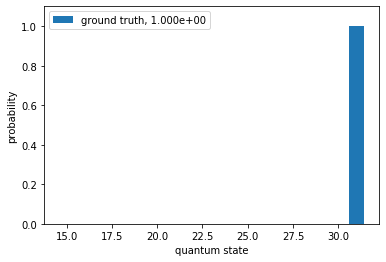

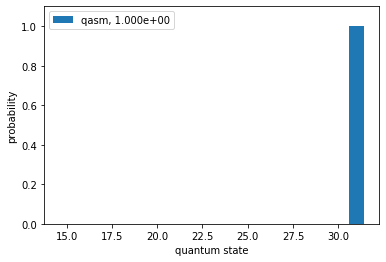

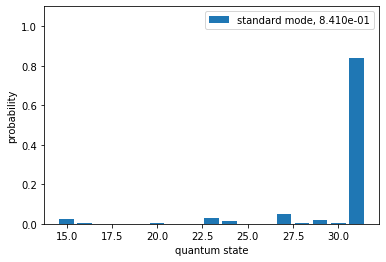

In [86]:
plot_range = min(256,len(d1))
start_idx = max_idx - int(plot_range/2)
x = np.arange(len(d1))[start_idx:start_idx+plot_range]
y_lim = 0
for d in [d1,d2,d3]:
    y_lim = max(y_lim,max(d))
y_lim *= 1.1

plt.figure()
plt.bar(x,height=d1[start_idx:start_idx+plot_range],label='ground truth, %.3e'%fidelity(d1,d1))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()

plt.figure()
plt.bar(x,height=d2[start_idx:start_idx+plot_range],label='qasm, %.3e'%fidelity(d1,d2))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()

plt.figure()
plt.bar(x,height=d3[start_idx:start_idx+plot_range],label='standard mode, %.3e'%fidelity(d1,d3))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()